In [1]:
# %pip install torch
# %pip install pymoo
# %pip install pywin32

In [2]:
print('hi')

hi


In [3]:
import os, sys

# Get the absolute path of the notebook's directory
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the parent directory to sys.path so we can import modules
sys.path.append(parent_dir)

# Verify the path
print(f"Added to sys.path: {parent_dir}")

# Add it to sys.path
sys.path.append(parent_dir)

print(parent_dir)
from localityaware.module import *
from NSGA_nn.nsga import *
from Vinyl_Distillation.VCDistillation import *

Added to sys.path: C:\Users\ppromte1\OneDrive - Johns Hopkins\Process Design\Aspen
C:\Users\ppromte1\OneDrive - Johns Hopkins\Process Design\Aspen
['C:\\Users\\ppromte1\\OneDrive - Johns Hopkins\\Process Design\\Aspen\\Vinyl_Distillation', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\ppromte1\\OneDrive - Johns Hopkins\\Process Design\\Aspen', 'C:\\Users\\ppromte1\\OneDrive - Johns Hopkins\\Process Design\\Aspen', 'C:\\Users\\ppromte1\\OneDrive - Johns Hopkins\\Process Design\\Aspen']


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import time

# Define the file path for saving/loading the data
data_file = "vcdistil.pkl"



print("Generating new data...")
assSim = VCDistillation(AspenFile="Vinyl Chloride Distillation.bkp", 
                        wdpath="../Vinyl_Distillation", 
                        visibility=True)

Generating new data...
The current Directory is :  
C:\Users\ppromte1\OneDrive - Johns Hopkins\Process Design\Aspen\Vinyl_Distillation
The new Directory where you should also have your Aspen file is : 
C:\Users\ppromte1\OneDrive - Johns Hopkins\Process Design\Aspen\Vinyl_Distillation
Aspen is active now. If you dont want to see aspen open again take VISIBITLY as False 



In [5]:
import numpy as np
import time
from scipy.stats import qmc

# Number of samples you want to generate
N = 100  # change this as needed

# Define lower and upper bounds for the 8 parameters
lower_bounds = np.array([
    30,    # trays low
    2,     # feed position low
    0.1,   # reflux ratio low
    0.46,  # distillate-to-feed ratio low
    35,    # trays high
    2,     # feed position high
    0.1,   # reflux ratio high
    0.89   # distillate-to-feed ratio high
])

upper_bounds = np.array([
    36,    # trays low
    29,    # feed position low
    1.5,   # reflux ratio low
    0.48,  # distillate-to-feed ratio low
    42,    # trays high
    34,    # feed position high
    1.5,   # reflux ratio high
    0.91   # distillate-to-feed ratio high
])


# Initialize the Latin Hypercube sampler for 8 dimensions
sampler = qmc.LatinHypercube(d=8)
sample_unit = sampler.random(n=N)  # Samples in [0, 1) with shape (N,8)

# Scale the samples to the desired parameter ranges
samples = qmc.scale(sample_unit, lower_bounds, upper_bounds)

# print("samples_scaled", samples_scaled)

# For integer parameters, round the values.
# We assume indices 0, 1, 4, and 5 are integers.
samples[:, 0] = np.round(samples[:, 0]).astype(int)
samples[:, 1] = np.round(samples[:, 1]).astype(int)
samples[:, 4] = np.round(samples[:, 4]).astype(int)
samples[:, 5] = np.round(samples[:, 5]).astype(int)

# For debugging: print the first few samples
print("First 5 LHS samples (each row corresponds to [trays low, feed low, reflux low, dist-feed low, trays high, feed high, reflux high, dist-feed high]):")
print(samples[:5])

First 5 LHS samples (each row corresponds to [trays low, feed low, reflux low, dist-feed low, trays high, feed high, reflux high, dist-feed high]):
[[35.         24.          0.25468154  0.46189463 36.          4.
   0.53445718  0.9004726 ]
 [34.          9.          1.13402563  0.46230725 37.         23.
   0.30623171  0.89908399]
 [35.         23.          0.53281404  0.47086158 36.         27.
   1.17663402  0.90530126]
 [34.         10.          1.32028764  0.47181873 36.         19.
   0.63869746  0.90288972]
 [33.         19.          1.33552896  0.47641424 37.          3.
   0.72897367  0.90504087]]


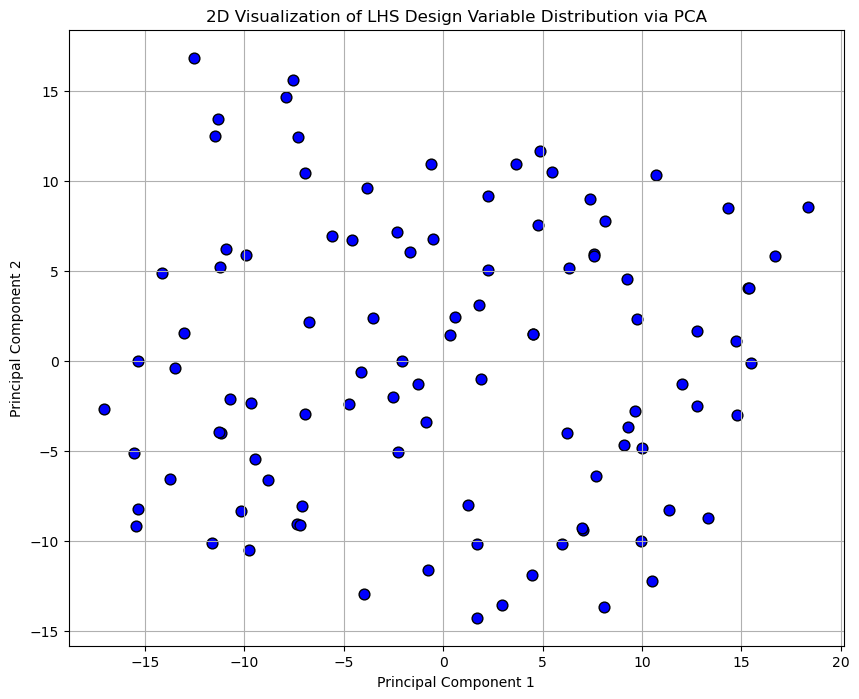

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Here, we assume samples_scaled is a NumPy array with shape (N, 8)
# representing your 8 design variables from LHS.
X_params = samples[:, :8]

# Apply PCA to reduce the 8-dimensional parameter space to 2 dimensions.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_params)

# Create a scatter plot for the reduced parameters.
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='blue', edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of LHS Design Variable Distribution via PCA')
plt.grid(True)
plt.show()


In [7]:
# # Start timing the data generation (simulation evaluations)
#             # first, import the module normally
# import VCDistillation   # This imports the module and adds it to sys.modules.
# import importlib
# importlib.reload(VCDistillation)  # Now it will reload the module.
# start_time = time.time()

# data_sim = []

# for param_array in samples:
#     # Convert the 8 parameters into the expected input format
#     x_unflat = assSim.unflatten_params(param_array)
#     print(x_unflat['Radfrac'])
#     # Run the objective function (this is where the Aspen or dummy simulation is called)
#     results = assSim.runSim(x_unflat)
#     acetyl = results['ACETYLENE_PURITY']
#     vinyl = results['VC_PURITY']
#     cost = assSim.costFunc(results)
#     data_sim.append(list(param_array) + [acetyl, vinyl]+ list(cost))
# print(data_sim[:2])
# data_sim = np.array(data_sim)
# elapsed = time.time() - start_time


In [8]:

# print(f"Generated {len(data_sim)} simulation points in {elapsed:.2f} seconds.")


# import pickle
# with open("../NSGA_nn/results/vinyl/data_sim_12dim.pkl", "wb") as f:
#     pickle.dump({"data": data_sim, "time_sec": elapsed}, f)

# data_sim = np.array(data_sim)
# data_gen_time = time.time() - start_time  # Total time to generate data
# total_original_assSim_calls = len(data_sim)

In [9]:
import pickle
with open('../NSGA_nn/results/vinyl/data_sim_12dim.pkl', 'rb') as f:
    out = pickle.load(f)
data_sim = out['data']

In [10]:
print(data_sim[0])

[3.00000000e+01 2.80000000e+01 5.63277935e-01 4.75067086e-01
 3.80000000e+01 2.90000000e+01 9.11560153e-01 9.02341635e-01
 2.96518058e-15 9.99872105e-01 3.36546905e+05 5.93528772e+03]


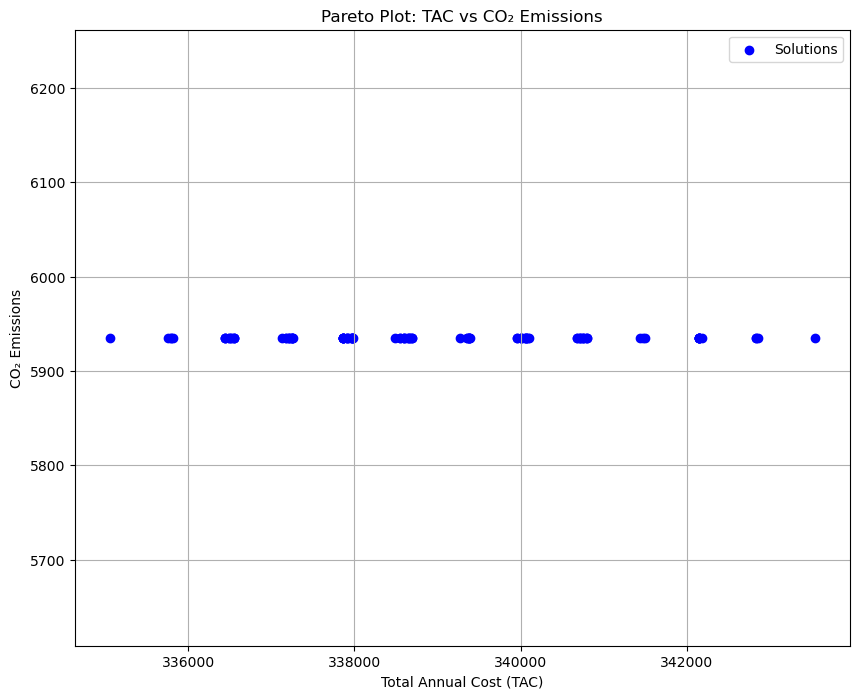

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# For demonstration purposes, assume you have an array of objectives
# with shape (N, 2) where each row is [TAC, CO₂ Emissions].
# Replace this with your actual data.
objectives = data_sim[:, -2:]  # Assuming the last two columns are the objectives
plt.figure(figsize=(10, 8))
plt.scatter(objectives[:, 0], objectives[:, 1], color='blue', marker='o', label="Solutions")
plt.xlabel('Total Annual Cost (TAC)')
plt.ylabel('CO₂ Emissions')
plt.title('Pareto Plot: TAC vs CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
print(len(data_sim))

# Instantiate the scaler with your provided ranges for 8-D inputs and 2-D outputs.
scaler = TorchMinMaxScaler(
    feature_range=(-1, 1), 
    max_vals=[36, 29, 1.5, 0.48, 42, 34, 1.5, 0.91],  # maximum for each of the 8 input parameters
    min_vals=[30, 2, 0.1, 0.46, 35, 2, 0.1, 0.89],       # minimum for each of the 8 inputs
    scale_y=True,
    min_y=[0, 0, 1e5, 1e4],   # minimum for the 4 outputs (e.g., acetyl purity, vinyl purity, TAC and CO₂)
    max_y=[1, 1, 1e6, 6e5]    # maximum for the 4 outputs
)

# Correct: use data_sim[:, :8] for inputs, and data_sim[:, 8:] for outputs.
data_sim_xscaled, data_sim_yscaled = scaler.transform(data_sim[:, :8], data_sim[:, 8:])

# Convert the PyTorch tensors to NumPy arrays.
data_sim_xscaled = data_sim_xscaled.detach().cpu().numpy()
data_sim_yscaled = data_sim_yscaled.detach().cpu().numpy()

# Check shapes for debugging:
print("Shape of scaled inputs:", data_sim_xscaled.shape)   # should be (N, 8)
print("Shape of scaled outputs:", data_sim_yscaled.shape)    # should be (N, 2)

# Recombine scaled inputs and outputs into one array with 10 columns (8 + 2).
data_sim_scaled = np.column_stack([data_sim_xscaled, data_sim_yscaled])
print("Shape of combined scaled data:", data_sim_scaled.shape)
print("First few rows of combined scaled data:\n", data_sim_scaled[:5])


# **Initialize Model & Dataset**
dataset = DynamicDataset(data_sim_scaled, num_inputs=8)
model = MLP(8, [50, 50, 20, 20, 50, 50], 4)

print("Dataset and model initialized.")

100
Shape of scaled inputs: (100, 8)
Shape of scaled outputs: (100, 4)
Shape of combined scaled data: (100, 12)
First few rows of combined scaled data:
 [[-1.          0.92592597 -0.33817434  0.5067078  -0.14285713  0.6875
   0.15937161  0.23416471 -1.          0.9997442  -0.4743402  -1.0137787 ]
 [ 1.          0.4074074   0.64249384 -0.01936901  1.          0.125
   0.5776391   0.6195376  -1.          0.9997442  -0.45880836 -1.0137787 ]
 [-0.3333333  -0.4814815   0.22173798 -0.879831   -0.14285713  0.
   0.9133011   0.25986624 -1.          0.9997442  -0.47124112 -1.0137787 ]
 [ 0.          0.5555556   0.33034706 -0.2924478   0.42857146 -0.9375
   0.22417295 -0.29043233 -1.          0.9997442  -0.4665137  -1.0137787 ]
 [-1.          0.5555556   0.16567564 -0.24803638  0.71428573  0.0625
   0.17841506 -0.10968167 -1.          0.9997442  -0.46956277 -1.0137787 ]]
Dataset and model initialized.


In [16]:
from VCDistillation import VinylDistillationNNProblem
threshold_scaler = TorchMinMaxScaler(
    feature_range=(-1, 1),
    min_vals=[0,0],  # Input bounds for 8 variables
    max_vals=[1,1],
    scale_y=False
)
problem = VinylDistillationNNProblem(model,threshold_scaler)

acetyl_threshold -0.999
vc_threshold 0.99979997


In [17]:
out = optimize_surr_nsga(model=model,
                   dataset=dataset,
                   assSim=assSim,
                   problem=problem,
                   lrs={'first':1e-3, 'others':1e-3},
                   epochs={'first':200, 'others':200},
                   min_vals=scaler.min_x,
                   max_vals=scaler.max_x,
                   scaler=scaler,
                   device='cpu',
                   iter=5,
                   print_loss=True,
                   print_it_data=True,
                   pop_size=400,
                   n_gen = 5,
                   new_data_size=5,
                   batch_size=25
                   )

Iteration 0: Training surrogate model...
Epoch 0: Total Loss=0.8131
Epoch 50: Total Loss=0.0169
Epoch 100: Total Loss=0.0013
Epoch 150: Total Loss=0.0004
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      400 |      4 |  0.000000E+00 |  0.0208455235 |             - |             -
     2 |      800 |      7 |  0.000000E+00 |  0.0002410969 |  0.3579738167 |         ideal
     3 |     1200 |      3 |  0.000000E+00 |  0.000000E+00 |  0.0629010814 |         ideal
     4 |     1600 |      3 |  0.000000E+00 |  0.000000E+00 |  0.7342314636 |         ideal
     5 |     2000 |      3 |  0.000000E+00 |  0.000000E+00 |  0.2189395234 |         ideal
optim_input_scaled.shape: (3, 8)
optim_input_scaled: [[-0.12657772 -0.99051492 -0.93235423 -0.94120046  0.11654818 -0.9487802
  -0.6769755   0.43759555]
 [ 0.69489962 -0.81273282  0.81194294  0.57782296  0.97245489 -0.9254135
  -0.55654549 -0.72729868]
 [ 0.2658814  -0.80500295  0.99335106 -0.703066

hi
unflattened optim: {'RadFrac': {'RADFRAC1': [32.50672, [19.022017, 'FEED'], 0.15721622, 0.4658075], 'RADFRAC2': [37.565464, [5.5513086, 'B1'], 0.39842045, 0.9057157]}}
hi
[32.50672, [19.022017, 'FEED'], 0.15721622, 0.4658075]
[37.565464, [5.5513086, 'B1'], 0.39842045, 0.9057157]
assSim_call_count: 20
Evaluated samples shape: (4, 12)
hi
[tensor(32.5006), [tensor(3.3273), 'FEED'], tensor(0.4767), tensor(0.4792)]
[tensor(40.2794), [tensor(7.9039), 'B1'], tensor(0.6337), tensor(0.8979)]
hi
[tensor(32.5067), [tensor(19.0649), 'FEED'], tensor(0.2883), tensor(0.4658)]
[tensor(38.8902), [tensor(5.5601), 'B1'], tensor(0.5254), tensor(0.9057)]
hi
[tensor(35.3510), [tensor(4.9561), 'FEED'], tensor(0.4494), tensor(0.4764)]
[tensor(38.3598), [tensor(2.3162), 'B1'], tensor(0.3810), tensor(0.9015)]
hi
[tensor(30.8920), [tensor(12.4058), 'FEED'], tensor(0.5463), tensor(0.4742)]
[tensor(39.5818), [tensor(8.2072), 'B1'], tensor(0.3470), tensor(0.8981)]
hi
[tensor(35.2275), [tensor(3.2417), 'FEED'], t

In [20]:
import os
import datetime
import pickle

data_gen_time = 0
total_original_assSim_calls = 100

print(os.getcwd())
# Get current notebook name manually (or hardcode it here)
notebook_name = "vinyl"  # or os.path.basename(__file__).replace(".py", "")

# Get timestamp
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Construct path: results/<notebook_name>/run_<timestamp>/
base_dir = os.path.join("../NSGA_nn/results", notebook_name)
save_dir = os.path.join(base_dir, f"run_{now}")
os.makedirs(save_dir, exist_ok=True)
print(save_dir)

print(f"Results will be saved in: {save_dir}")

# Save out.pkl
out["data_gen_time"] = data_gen_time
out["total_original_assSim_calls"] = total_original_assSim_calls
with open(os.path.join(save_dir, "out.pkl"), "wb") as f:
    pickle.dump(out, f)

# Save scaler
with open(os.path.join(save_dir, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

# Save dataset
with open(os.path.join(save_dir, "dataset.pkl"), "wb") as f:
    pickle.dump(dataset, f)

print(f"Saved all results in {save_dir}")


C:\Users\ppromte1\OneDrive - Johns Hopkins\Process Design\Aspen\Vinyl_Distillation
../NSGA_nn/results\vinyl\run_2025-04-15_10-18-34
Results will be saved in: ../NSGA_nn/results\vinyl\run_2025-04-15_10-18-34
Saved all results in ../NSGA_nn/results\vinyl\run_2025-04-15_10-18-34
